# Project Milestone 2

In milestone 2, I started working with the visualizations part, where my objective for this project was to see the probability of the customers being churn and customer lifetime value. To get a clearer idea, visualizations of important features are very crucial. 

In my project milestone 1, after cleaning the data I created 02 important additional columns, which are Customer Lifetime Value (CLV), was calculated by multiplying the Monthly Charges a customer pays by their Tenure (how long they’ve been a customer). This gives an estimation of how much value a customer brings over their lifetime. The second, Average Monthly Spend, was calculated by dividing Total Charges by Tenure to understand how much a customer spends on average each month. These new columns provide a deeper understanding of customer behavior, which will be valuable for predicting churn and assessing customer value in future analysis.

Also, here I have tried the boxplot, hist plot, count plot, scatter plot, and line plot.

The graphs basically show that customers who are happy and stay longer usually spend more and are less likely to leave. Churned customers often have lower satisfaction and lower lifetime value. Also, the longer a customer stays, the more valuable they become. These patterns suggest focusing on keeping customers satisfied and engaged to reduce churn.

I also want to add that as per the instructions for the final project, I've completed key steps in my final project. I’ve defined the main goal, explored the data, and cleaned it by removing irrelevant columns and handling missing values. I also created new features like CLV and average monthly spending to help with analysis. I’ve worked on visualizations to present the data clearly to the intended audience. I am also thinking about what could be improved in future steps. 

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Here I have done exploratpory work before I start working with missing values, new column creation and other data cleaning tasks.

In [189]:
my_data = pd.read_csv('telco.csv')

In [190]:
my_data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


#### Initially the dataset contains 49 columns where data types are float64(8), int64(11), object(31) 

In [191]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [192]:
my_data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [193]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [194]:
my_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [195]:
# Removing irrelevant columns from the Dataframe
rem_columns = [
    'Customer ID', 'Under 30', 'Dependents', 'Number of Dependents', 'Country', 'State', 'Married', 'City', 'Zip Code',
    'Latitude', 'Longitude', 'Population', 'Quarter', 'Number of Referrals', 'Offer',
    'Avg Monthly Long Distance Charges', 'Internet Type', 'Avg Monthly GB Download',
    'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 
    'Customer Status', 'Streaming TV','Streaming Movies', 'Streaming Music', 'Avg Monthly GB Download',
]

# Drop the unnecessary columns
df_cleaned = my_data.drop(columns= rem_columns)

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("telco_cleaned.csv", index=False)



# Assign the cleaned data to 'my_data'
my_ndata = df_cleaned

# Display the first few rows of 'my_data' to confirm
my_ndata.head()

,Gender,Age,Senior Citizen,Referred a Friend,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Payment Method,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,Yes,No,1,No,No,Yes,No,No,...,Bank Withdrawal,39.65,39.65,59.65,3,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,Yes,Yes,8,Yes,Yes,Yes,No,Yes,...,Credit Card,80.65,633.30,1024.10,3,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,Yes,No,18,Yes,Yes,Yes,No,No,...,Bank Withdrawal,95.45,1752.55,1910.88,2,Yes,81,3179,Competitor,Competitor made better offer
3,Female,78,Yes,Yes,25,Yes,No,Yes,No,Yes,...,Bank Withdrawal,98.50,2514.50,2995.07,2,Yes,88,5337,Dissatisfaction,Limited range of services
4,Female,80,Yes,Yes,37,Yes,Yes,Yes,No,No,...,Bank Withdrawal,76.50,2868.15,3102.36,2,Yes,67,2793,Price,Extra data charges


In [196]:
# Checking Missing Values
my_ndata.isnull().sum()

Gender                       0
Age                          0
Senior Citizen               0
Referred a Friend            0
Tenure in Months             0
Phone Service                0
Multiple Lines               0
Internet Service             0
Online Security              0
Online Backup                0
Device Protection Plan       0
Premium Tech Support         0
Unlimited Data               0
Contract                     0
Paperless Billing            0
Payment Method               0
Monthly Charge               0
Total Charges                0
Total Revenue                0
Satisfaction Score           0
Churn Label                  0
Churn Score                  0
CLTV                         0
Churn Category            5174
Churn Reason              5174
dtype: int64

After removing the unnecessary column from the dataset, I have kept 24 columns. Also, I have not changed any data type because all the crucial columns are integer or float data type.

In [198]:
my_ndata.columns

Index(['Gender', 'Age', 'Senior Citizen', 'Referred a Friend',
       'Tenure in Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [199]:
my_ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   object 
 1   Age                     7043 non-null   int64  
 2   Senior Citizen          7043 non-null   object 
 3   Referred a Friend       7043 non-null   object 
 4   Tenure in Months        7043 non-null   int64  
 5   Phone Service           7043 non-null   object 
 6   Multiple Lines          7043 non-null   object 
 7   Internet Service        7043 non-null   object 
 8   Online Security         7043 non-null   object 
 9   Online Backup           7043 non-null   object 
 10  Device Protection Plan  7043 non-null   object 
 11  Premium Tech Support    7043 non-null   object 
 12  Unlimited Data          7043 non-null   object 
 13  Contract                7043 non-null   object 
 14  Paperless Billing       7043 non-null   

In [200]:
# Check for missing values in the cleaned dataset 'my_data'
missing_values = my_ndata.isnull().sum()


missing_values.info()

<class 'pandas.core.series.Series'>
Index: 25 entries, Gender to Churn Reason
Series name: None
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 956.0+ bytes


In [201]:
# Show the columns with missing values
missing_values[missing_values > 0]

Churn Category    5174
Churn Reason      5174
dtype: int64

In [202]:
# Creating new column for CLV (Customer Lifetime Value)
# 1. CLV (Customer Lifetime Value)
my_ndata['CLV'] = my_ndata['Monthly Charge'] * my_ndata['Tenure in Months']

my_ndata.head()

,Gender,Age,Senior Citizen,Referred a Friend,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,CLV
0,Male,78,Yes,No,1,No,No,Yes,No,No,...,39.65,39.65,59.65,3,Yes,91,5433,Competitor,Competitor offered more data,39.65
1,Female,74,Yes,Yes,8,Yes,Yes,Yes,No,Yes,...,80.65,633.30,1024.10,3,Yes,69,5302,Competitor,Competitor made better offer,645.20
2,Male,71,Yes,No,18,Yes,Yes,Yes,No,No,...,95.45,1752.55,1910.88,2,Yes,81,3179,Competitor,Competitor made better offer,1718.10
3,Female,78,Yes,Yes,25,Yes,No,Yes,No,Yes,...,98.50,2514.50,2995.07,2,Yes,88,5337,Dissatisfaction,Limited range of services,2462.50
4,Female,80,Yes,Yes,37,Yes,Yes,Yes,No,No,...,76.50,2868.15,3102.36,2,Yes,67,2793,Price,Extra data charges,2830.50


In [203]:
my_ndata.columns

Index(['Gender', 'Age', 'Senior Citizen', 'Referred a Friend',
       'Tenure in Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason', 'CLV'],
      dtype='object')

In [204]:
#AvgMonthlySpend (Average Monthly Spend)
my_ndata['AvgMonthlySpend'] = my_ndata['Total Charges'] / my_ndata['Tenure in Months']

my_ndata.columns

Index(['Gender', 'Age', 'Senior Citizen', 'Referred a Friend',
       'Tenure in Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason', 'CLV',
       'AvgMonthlySpend'],
      dtype='object')

In [205]:
my_ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   object 
 1   Age                     7043 non-null   int64  
 2   Senior Citizen          7043 non-null   object 
 3   Referred a Friend       7043 non-null   object 
 4   Tenure in Months        7043 non-null   int64  
 5   Phone Service           7043 non-null   object 
 6   Multiple Lines          7043 non-null   object 
 7   Internet Service        7043 non-null   object 
 8   Online Security         7043 non-null   object 
 9   Online Backup           7043 non-null   object 
 10  Device Protection Plan  7043 non-null   object 
 11  Premium Tech Support    7043 non-null   object 
 12  Unlimited Data          7043 non-null   object 
 13  Contract                7043 non-null   object 
 14  Paperless Billing       7043 non-null   

## Project Milestone 2 - Visualizations

I made this count plot to easily understand how many customers are staying and how many already have left. So, we can get a clear picture of the churn situation at a glance.

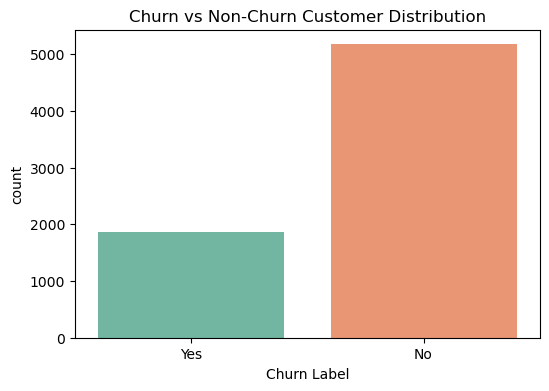

In [206]:
#### Churn Rate Overview

plt.figure(figsize=(6,4))
sns.countplot(x='Churn Label', hue='Churn Label', data=my_ndata, palette='Set2', legend=False)
plt.title('Churn vs Non-Churn Customer Distribution')
plt.show()

Here I made this graph to see how much value most customers bring to the company or in other words how important the customer is for the company.

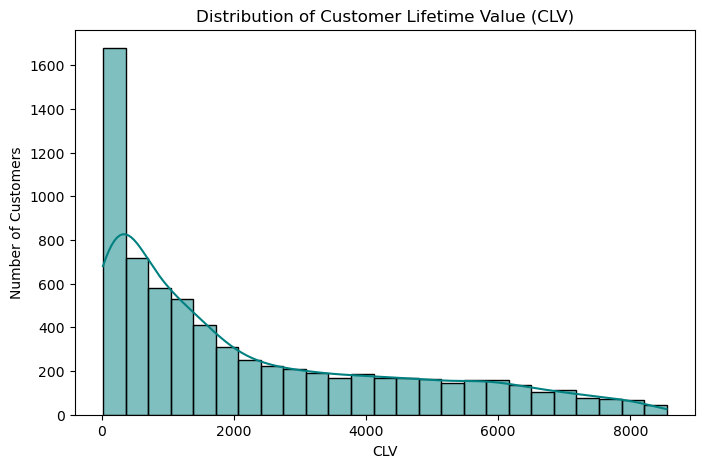

In [207]:
## Customer Lifetime Value Distribution

plt.figure(figsize=(8,5))
sns.histplot(my_ndata['CLV'], kde=True, color='teal')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.show()


Although, here I created this chart to compare the Customer Lifetime Value (CLV) between churned and active customers, helping spot if loyal customers tend to spend more or less over their lifetime. But I think this graph doesn't represent clearer information.

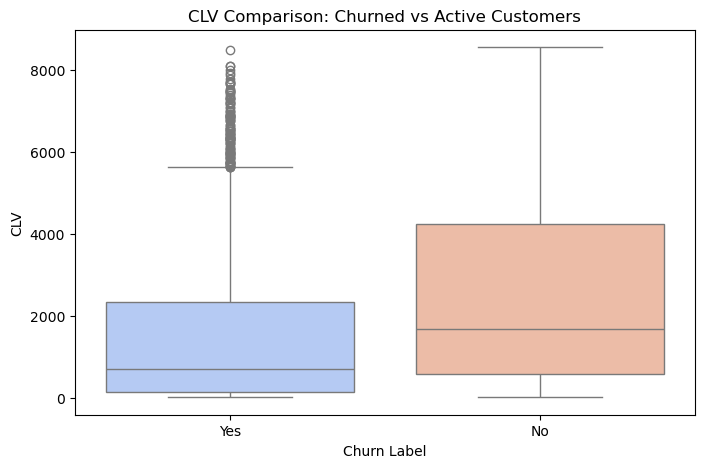

In [208]:
### Churn Status by CLV Levels

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Label', y='CLV', hue='Churn Label', data=my_ndata, palette='coolwarm', legend=False)
plt.title('CLV Comparison: Churned vs Active Customers')
plt.show()


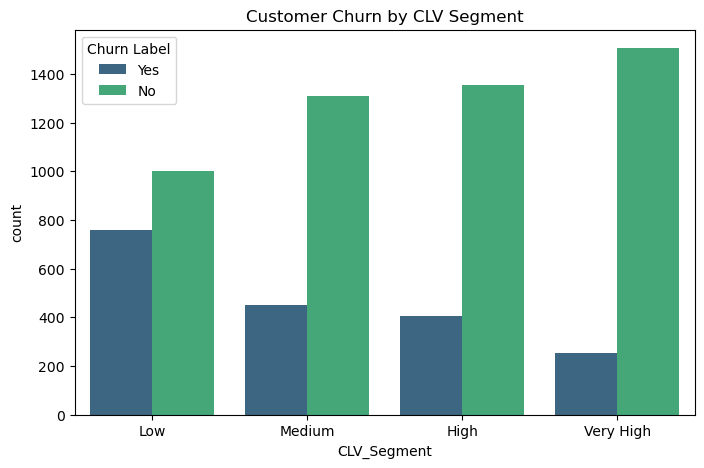

In [209]:
### CLV Segmentation by Customer Group
my_ndata['CLV_Segment'] = pd.qcut(my_ndata['CLV'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8,5))
sns.countplot(x='CLV_Segment', hue='Churn Label', data=my_ndata, palette='viridis')
plt.title('Customer Churn by CLV Segment')
plt.show()


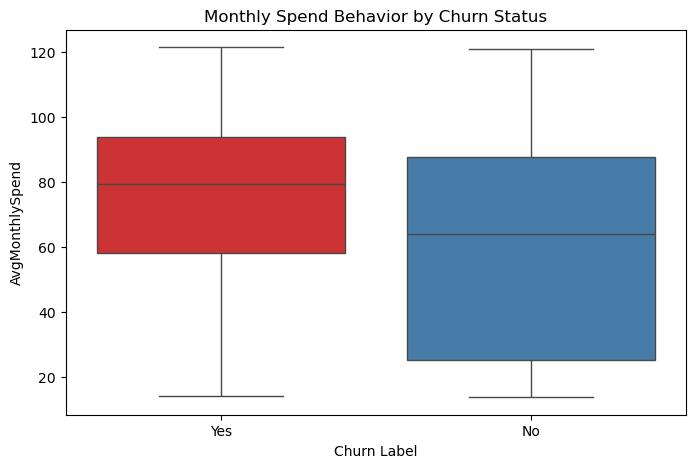

In [210]:
### Monthly Spend Distribution by Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Label', y='AvgMonthlySpend', hue='Churn Label', data=my_ndata, palette='Set1', legend=False)
plt.title('Monthly Spend Behavior by Churn Status')
plt.show()


This scatter plot shows the relationship between customer tenure and their average monthly spend, while also highlighting their churn status — helping visualize if longer-tenure customers spend more or are less likely to churn

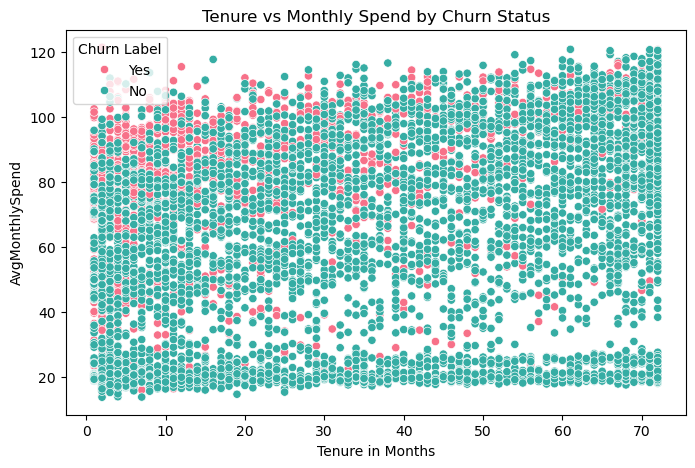

In [211]:
### Tenure vs Monthly Spend Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Tenure in Months', y='AvgMonthlySpend', hue='Churn Label', data=my_ndata, palette='husl')
plt.title('Tenure vs Monthly Spend by Churn Status')
plt.show()


This line graph shows how customer satisfaction scores change as their tenure increases, helping spot patterns in long-term engagement and happiness

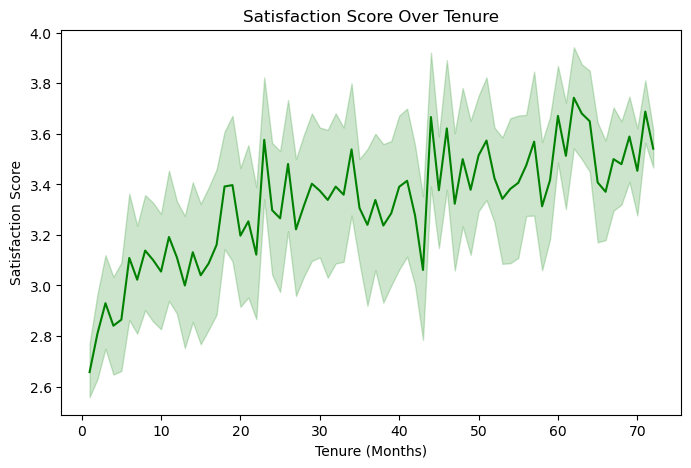

In [213]:
### Line Graph for Satisfaction Score Over Tenure (Time-Based Trend)


plt.figure(figsize=(8,5))
sns.lineplot(x='Tenure in Months', y='Satisfaction Score', data=my_ndata, color='green')
plt.title('Satisfaction Score Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Satisfaction Score')
plt.show()


References:

1. https://www.youtube.com/watch?v=6zWPaD-bkDM
2. https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3